In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Social_Network_Ads Data

### Read Data

In [4]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Data Preprocessing

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df = df.drop(columns = ["User ID"])

In [8]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [9]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


In [11]:
y = df['Purchased'].to_numpy()
x = df.iloc[:, [0, 1, 2]].values

### Apply K-Medoid


In [3]:
from sklearn_extra.cluster import KMedoids

In [12]:
kmed = KMedoids(n_clusters=2)
y_kmed = kmed.fit_predict(x)

In [13]:
len(y_kmed)

400

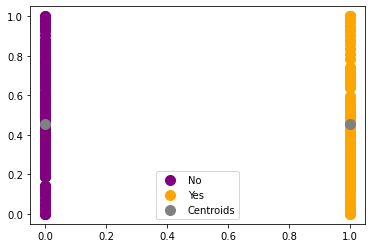

In [14]:
#Visualising the clusters
plt.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


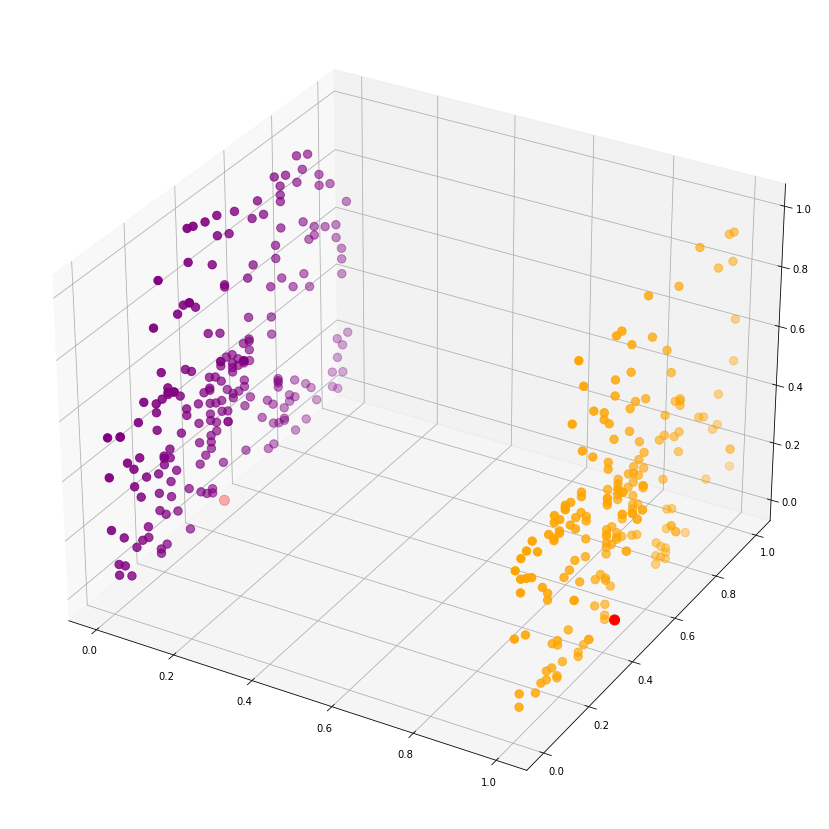

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], x[y_kmed == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], x[y_kmed == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y, y_kmed)
ac = accuracy_score(y,y_kmed)

In [19]:
print("Accuracy: ", ac)

Accuracy:  0.4825


<AxesSubplot:>

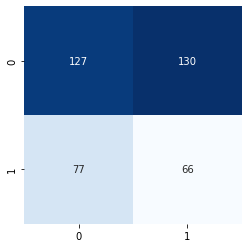

In [20]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## 2. Mall Customers Data

### Read Data

In [21]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Preprocessing

In [23]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df = df.drop(columns = ["CustomerID"])

In [25]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])

In [26]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [27]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [28]:
x = df.values

### Apply K-Medoids

In [29]:
kmed = KMedoids(n_clusters=2)
y_kmed = kmed.fit_predict(x)

In [30]:
len(y_kmed)

200

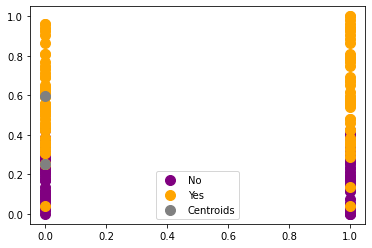

In [31]:
#Visualising the clusters
plt.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


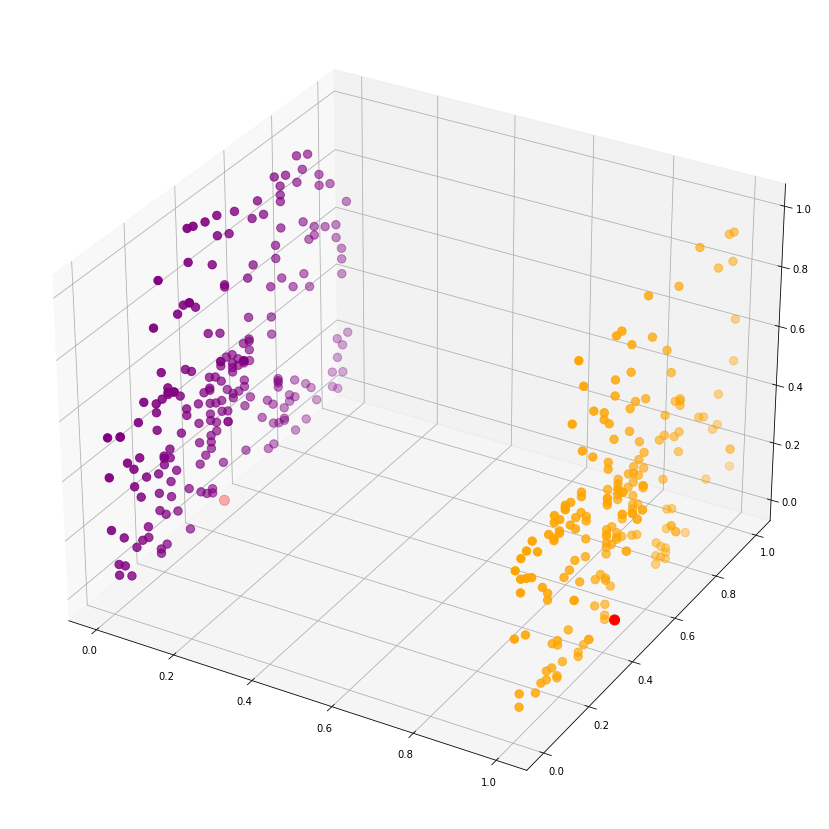

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], x[y_kmed == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], x[y_kmed == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()